Here we will be trying out several ensembles starting from Random forest to custom stacking ensemble classifier.

**6. Random Forest Classifier**

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
X_train=pd.read_csv('/content/drive/MyDrive/X_train.csv')
X_test=pd.read_csv('/content/drive/MyDrive/X_test.csv')
y_train=X_train['y_train']
y_test=X_test['y_test']
X_train.drop('y_train',axis=1,inplace=True)
X_test.drop('y_test',axis=1,inplace=True)
import math
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from mlxtend.classifier import StackingCVClassifier
X_train.drop(['Unnamed: 0'],axis=1,inplace=True)
X_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def Heatmapgen(x):
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea referred from here
  group_names = ['True -ve','False +ve','False -ve','True +ve']
  group_counts = ['{0:0.0f}'.format(value) for value in x.flatten()]
  labels = [f'{v1}\n{v2}' for v1, v2 in
  zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(x, annot=labels, fmt='', cmap='RdBu')

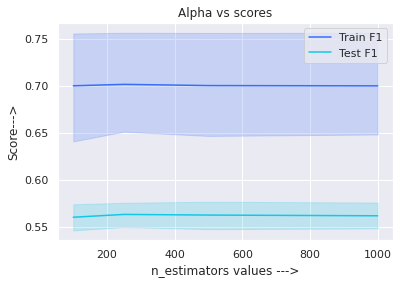

Best estimator : {'model__max_depth': 13, 'model__min_samples_split': 7, 'model__n_estimators': 250}
Best score: 0.6056385088772984


In [ ]:
param={'model__n_estimators':[100,250,500,1000],
       'model__max_depth':[3,5,7,9,13],
      'model__min_samples_split':[2,5,7,9]
       }
steps=[]
steps.append(('sampling',RandomOverSampler()))       
steps.append(('model', RandomForestClassifier(random_state=21)))
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, param, cv=10, scoring='f1',return_train_score=True)
clf.fit(X_train,y_train)param={'model__n_estimators':[100,250,500,1000],
result_clf=result_clf.sort_values('param_model__n_estimators')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [i for i in result_clf['param_model__n_estimators']]
result_clf=pd.DataFrame.from_dict(clf.cv_results_)
result_clf=result_clf.sort_values('param_model__n_estimators')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [i for i in result_clf['param_model__n_estimators']]
plt.figure(figsize=(6,4))
sns.lineplot(x=alpha_vals,y=result_train,markers='o',label='Train F1')
sns.lineplot(x=alpha_vals,y=result_cv,markers='o',label='Test F1')
sns.set(palette='rainbow')
plt.xlabel('n_estimators values --->')
plt.ylabel('Score--->')
plt.title('Alpha vs scores')
plt.show()
print('Best estimator :',clf.best_params_)
print('Best score:',clf.best_score_)

In [ ]:
q=clf.predict(X_test)
print('Test F1 score:',f1_score(y_test,q))

Test F1 score: 0.6403508771929823


F1 score on test set = 0.6403508771929823


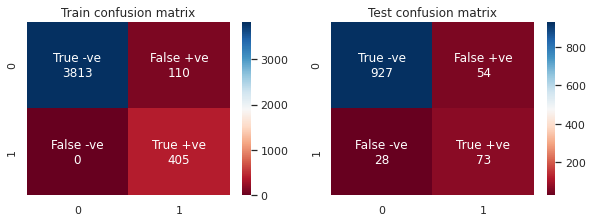

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
print("="*100)
from sklearn.metrics import confusion_matrix
cf_matr1=confusion_matrix(y_train,clf.predict(X_train.values))
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_test,clf.predict(X_test.values))
plt.title('Test confusion matrix')
Heatmapgen(cf_matr2)
print('F1 score on test set =',f1_score(y_test,clf.predict(X_test.values)))

**7 XgBoost with oversampling**

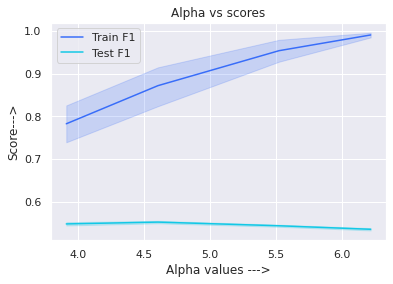

Best estimator : {'model__col_sample_bytree': 0.7, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 0.5}
Best score: 0.5723750673384669


In [ ]:
import math
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param={'model__n_estimators':[50,100,250,500]
       ,'model__max_depth':[3,5,7,9]
       ,'model__col_sample_bytree':[0.3,0.5,0.7]
       ,'model__subsample':[0.5,0.7,0.9]
       }
steps=[]
steps.append(('sampling',RandomOverSampler()))       
steps.append(('model', XGBClassifier()))
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, param, cv=3, scoring='f1',return_train_score=True)
clf.fit(X_train.values,y_train)
result_clf=pd.DataFrame.from_dict(clf.cv_results_)
result_clf=result_clf.sort_values('param_model__n_estimators')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [math.log(i) for i in result_clf['param_model__n_estimators']]
plt.figure(figsize=(6,4))
sns.lineplot(x=alpha_vals,y=result_train,markers='o',label='Train F1')
sns.lineplot(x=alpha_vals,y=result_cv,markers='o',label='Test F1')
sns.set(palette='rainbow')
plt.xlabel('Alpha values --->')
plt.ylabel('Score--->')
plt.title('Alpha vs scores')
plt.show()
print('Best estimator :',clf.best_params_)
print('Best score:',clf.best_score_)

In [ ]:
q=clf.predict(X_test.values)
f1_score(q,y_test)

0.6050420168067226

**8. XGBoost with class weight balancing**

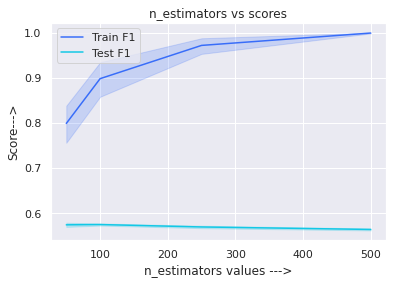

Best estimator : {'model__col_sample_bytree': 0.3, 'model__max_depth': 3, 'model__n_estimators': 250, 'model__subsample': 0.9}
Best score: 0.5922350305263345


In [ ]:
import math
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param={'model__n_estimators':[50,100,250,500]
       ,'model__max_depth':[3,5,7,9]
       ,'model__col_sample_bytree':[0.3,0.5,0.7]
       ,'model__subsample':[0.5,0.7,0.9]
       }
steps=[]
# steps.append(('sampling',RandomOverSampler()))       
steps.append(('model', XGBClassifier(scale_pos_weight=9)))
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, param, cv=3, scoring='f1',return_train_score=True)
clf.fit(X_train.values,y_train)
result_clf=pd.DataFrame.from_dict(clf.cv_results_)
result_clf=result_clf.sort_values('param_model__n_estimators')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [i for i in result_clf['param_model__n_estimators']]
plt.figure(figsize=(6,4))
sns.lineplot(x=alpha_vals,y=result_train,markers='o',label='Train F1')
sns.lineplot(x=alpha_vals,y=result_cv,markers='o',label='Test F1')
sns.set(palette='rainbow')
plt.xlabel('n_estimators values --->')
plt.ylabel('Score--->')
plt.title('n_estimators vs scores')
plt.show()
print('Best estimator :',clf.best_params_)
print('Best score:',clf.best_score_)

In [ ]:
q=clf.predict(X_test.values)
f1_score(q,y_test)

0.5873605947955391

F1 score on test set = 0.5873605947955391


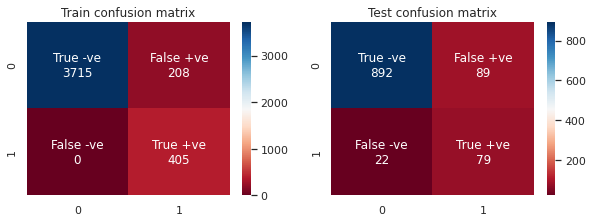

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
print("="*100)
from sklearn.metrics import confusion_matrix
cf_matr1=confusion_matrix(y_train,clf.predict(X_train.values))
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_test,clf.predict(X_test.values))
plt.title('Test confusion matrix')
Heatmapgen(cf_matr2)
print('F1 score on test set =',f1_score(y_test,clf.predict(X_test.values)))

**9. LGBM classifier with oversampling**

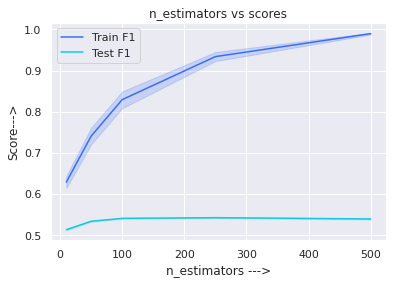

Best estimator : {'model__max_depth': 7, 'model__min_data_in_leaf': 11, 'model__min_gain_to_split': 0.3, 'model__n_estimators': 500, 'model__num_leaves': 32}
Best score: 0.5698382234096243


In [ ]:
from lightgbm import LGBMClassifier
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param={'model__n_estimators':[10,50,100,250,500]
       ,'model__max_depth':[3,5,7,9]
       ,'model__min_data_in_leaf':[3,5,7,11]
       ,'model__min_gain_to_split':[0.0,0.1,0.3],
       'model__num_leaves':[8,32,64,96]
       }
steps=[]
steps.append(('sampling',RandomOverSampler()))       
steps.append(('model', LGBMClassifier()))
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, param, cv=3, scoring='f1',return_train_score=True)
clf.fit(X_train.values,y_train)
result_clf=pd.DataFrame.from_dict(clf.cv_results_)
result_clf=result_clf.sort_values('param_model__n_estimators')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [i for i in result_clf['param_model__n_estimators']]
plt.figure(figsize=(6,4))
sns.lineplot(x=alpha_vals,y=result_train,markers='o',label='Train F1')
sns.lineplot(x=alpha_vals,y=result_cv,markers='o',label='Test F1')
sns.set(palette='rainbow')
plt.xlabel('n_estimators --->')
plt.ylabel('Score--->')
plt.title('n_estimators vs scores')
plt.show()
print('Best estimator :',clf.best_params_)
print('Best score:',clf.best_score_)

In [ ]:
q=clf.predict(X_test.values)
f1_score(q,y_test)

0.5299145299145299

**10. LightGBM with weight balancing**

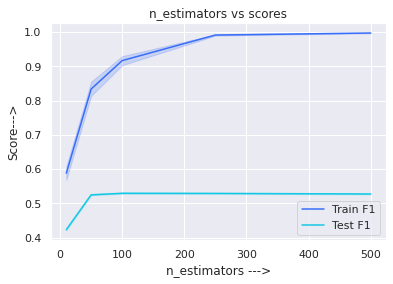

Best estimator : {'model__max_depth': 9, 'model__min_data_in_leaf': 11, 'model__min_gain_to_split': 0.3, 'model__n_estimators': 50, 'model__num_leaves': 32}
Best score: 0.5546296142126909


In [ ]:
from lightgbm import LGBMClassifier
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param={'model__n_estimators':[10,50,100,250,500]
       ,'model__max_depth':[3,5,7,9]
       ,'model__min_data_in_leaf':[3,5,7,11]
       ,'model__min_gain_to_split':[0.0,0.1,0.3],
       'model__num_leaves':[8,32,64,96]
       }
steps=[]
# steps.append(('sampling',RandomOverSampler()))       
steps.append(('model', LGBMClassifier()))
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, param, cv=3, scoring='f1',return_train_score=True)
clf.fit(X_train.values,y_train)
result_clf=pd.DataFrame.from_dict(clf.cv_results_)
result_clf=result_clf.sort_values('param_model__n_estimators')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [i for i in result_clf['param_model__n_estimators']]
plt.figure(figsize=(6,4))
sns.lineplot(x=alpha_vals,y=result_train,markers='o',label='Train F1')
sns.lineplot(x=alpha_vals,y=result_cv,markers='o',label='Test F1')
sns.set(palette='rainbow')
plt.xlabel('n_estimators --->')
plt.ylabel('Score--->')
plt.title('n_estimators vs scores')
plt.show()
print('Best estimator :',clf.best_params_)
print('Best score:',clf.best_score_)

In [ ]:
q=clf.predict(X_test.values)
f1_score(q,y_test)

0.6011560693641618

F1 score on test set = 0.6011560693641618


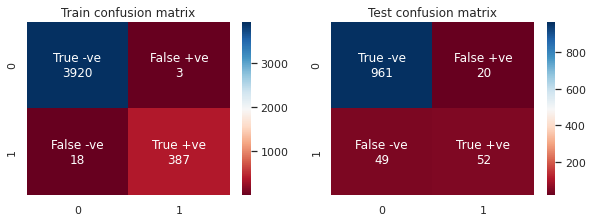

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
print("="*100)
from sklearn.metrics import confusion_matrix
cf_matr1=confusion_matrix(y_train,clf.predict(X_train))
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_test,clf.predict(X_test))
plt.title('Test confusion matrix')
Heatmapgen(cf_matr2)
print('F1 score on test set =',f1_score(y_test,clf.predict(X_test)))

This model is giving comparable performance to Xgboost but at higher false negatives..

**11. Catboost**

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 53kB/s 


Streaming output truncated to the last 5000 lines.
40:	learn: 0.1524026	total: 2.63s	remaining: 578ms
41:	learn: 0.1507448	total: 2.71s	remaining: 516ms
42:	learn: 0.1497027	total: 2.77s	remaining: 451ms
43:	learn: 0.1473185	total: 2.83s	remaining: 387ms
44:	learn: 0.1461550	total: 2.9s	remaining: 322ms
45:	learn: 0.1445967	total: 2.97s	remaining: 258ms
46:	learn: 0.1432039	total: 3.04s	remaining: 194ms
47:	learn: 0.1419276	total: 3.1s	remaining: 129ms
48:	learn: 0.1401957	total: 3.16s	remaining: 64.5ms
49:	learn: 0.1382599	total: 3.24s	remaining: 0us
0:	learn: 0.6171815	total: 60.8ms	remaining: 2.98s
1:	learn: 0.5623875	total: 128ms	remaining: 3.08s
2:	learn: 0.5152374	total: 191ms	remaining: 2.98s
3:	learn: 0.4750427	total: 252ms	remaining: 2.9s
4:	learn: 0.4330383	total: 314ms	remaining: 2.82s
5:	learn: 0.4006397	total: 392ms	remaining: 2.87s
6:	learn: 0.3730126	total: 454ms	remaining: 2.79s
7:	learn: 0.3522459	total: 517ms	remaining: 2.71s
8:	learn: 0.3297206	total: 580ms	remaining

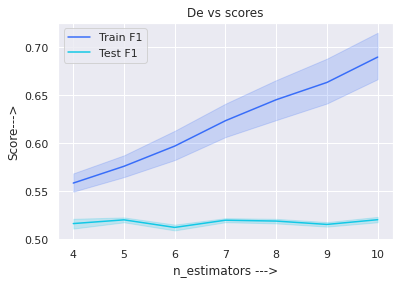

Best estimator : {'model__depth': 4, 'model__iterations': 90, 'model__learning_rate': 0.03}
Best score: 0.5434032822726832


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
param = {'model__depth'         : [4,5,6,7,8,9, 10],
                 'model__learning_rate' : [0.01,0.02,0.03,0.04],
                  'model__iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
steps=[]
# steps.append(('sampling',RandomOverSampler()))       
steps.append(('model', CatBoostClassifier()))
pipeline = Pipeline(steps=steps)
clf = GridSearchCV(pipeline, param, cv=3, scoring='f1',return_train_score=True)
clf.fit(X_train.values,y_train)
result_clf=pd.DataFrame.from_dict(clf.cv_results_)
result_clf=result_clf.sort_values('param_model__depth')
result_cv=result_clf['mean_test_score']
result_train=result_clf['mean_train_score']
alpha_vals = [i for i in result_clf['param_model__depth']]
plt.figure(figsize=(6,4))
sns.lineplot(x=alpha_vals,y=result_train,markers='o',label='Train F1')
sns.lineplot(x=alpha_vals,y=result_cv,markers='o',label='Test F1')
sns.set(palette='rainbow')
plt.xlabel('n_estimators --->')
plt.ylabel('Score--->')
plt.title('De vs scores')
plt.show()
print('Best estimator :',clf.best_params_)
print('Best score:',clf.best_score_)

In [ ]:
q=clf.predict(X_test.values)
f1_score(q,y_test)

0.6428571428571428

F1 score on test set = 0.6428571428571428


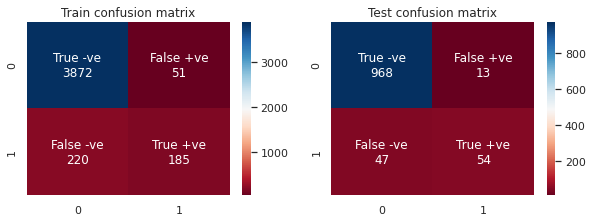

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
print("="*100)
from sklearn.metrics import confusion_matrix
cf_matr1=confusion_matrix(y_train,clf.predict(X_train))
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_test,clf.predict(X_test))
plt.title('Test confusion matrix')
Heatmapgen(cf_matr2)
print('F1 score on test set =',f1_score(y_test,clf.predict(X_test)))

**Custom stacking ensemble**

In [ ]:
D1,D2,y_D1,y_D2=train_test_split(X_train,y_train,test_size=0.5,stratify=y_train)

In [ ]:
def stacker(num_base_learners):
  """This function takes input number of baselearners and returns a trained stacking classfier on below given base classifiers and meta classifiers"""
  b_clf=[('LR',LogisticRegression()),('SVM',SVC()),('DT',DecisionTreeClassifier()),('KNN',KNeighborsClassifier()),('Naive Bayes',GaussianNB()),
         ('Xgboost',XGBClassifier()),('RandomForest',RandomForestClassifier()),('LightGBM',LGBMClassifier())]        #base learners
  m_clf=[('LR',LogisticRegression()),('RandomForest',RandomForestClassifier()),('Xgboost',XGBClassifier())]          #meta learners
  D1['y_D1']=y_D1
  clf_comb=[]
  base_pred=[]
  for i in range(num_base_learners):                                                                                 #generating 'k' samples
      samp_D=D1.sample(frac=0.8,replace=True)
      y_samp=samp_D['y_D1']
      samp_D.drop('y_D1',inplace=True,axis=1)
      b_clf_ch=random.choice(b_clf)
      b_clf_ch[1].fit(samp_D,y_samp)
      y_pred=b_clf_ch[1].predict(D2)                                                                                  #predicting on rest 50% of data
      base_pred.append(y_pred)
      clf_comb.append(b_clf_ch[1])
  m_clf_ch=random.choice(m_clf)
  m_clf_ch[1].fit(np.array(base_pred).T,y_D2)                                                                          #creating a dataset out of predictions
  y_pred=m_clf_ch[1].predict(np.array(base_pred).T)                                                                    #fitting the dataset on metaclassifier
  score=f1_score(y_D2,y_pred)
  details={'Base_clf':clf_comb,'Meta_clf':m_clf_ch[1],'Num_learners':num_base_learners}                                 
  return score,details                                                                                                 #returning f1 scores and details of base learners
                                                                                                                      # and meta learners


  

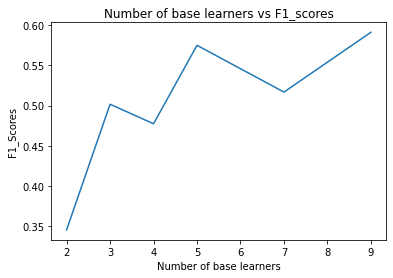

In [ ]:
#trying out various number baselearners
base_learners=[2,3,4,5,7,9]
score_list=[]
details_list=[]
for i in base_learners:                                                                                                     #parameter tuning for best number of base learners
  scores,details=stacker(i)
  score_list.append(scores)
  details_list.append(details)
max_score=np.argmax(score_list)
plt.plot(base_learners,score_list)
plt.title('Number of base learners vs F1_scores')
plt.xlabel('Number of base learners')  
plt.ylabel('F1_Scores')
plt.show()  

In [ ]:
#Evaluating on remaining test set
pred_arr_tr=[]                                                                                                        
pred_arr_te=[]
for i in details_list[max_score]['Base_clf']:
  pred_arr_tr.append(i.predict(X_train))
  pred_arr_te.append(i.predict(X_test))
y_pred_tr=details_list[max_score]['Meta_clf'].predict(np.array(pred_arr_tr).T)  
y_pred_te=details_list[max_score]['Meta_clf'].predict(np.array(pred_arr_te).T)  
print('Train Scores',f1_score(y_train,y_pred_tr))
print('Test F1 Scores',f1_score(y_test,y_pred_te))

Train Scores 0.6468200270635994
Test F1 Scores 0.648936170212766


F1 score on test set = 0.648936170212766


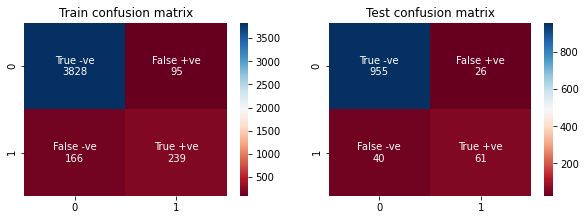

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
print("="*100)
from sklearn.metrics import confusion_matrix
cf_matr1=confusion_matrix(y_train,y_pred_tr)
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_test,y_pred_te)
plt.title('Test confusion matrix')
Heatmapgen(cf_matr2)
print('F1 score on test set =',f1_score(y_test,y_pred_te))

**Hyperparameter tuned stacking classifier**

In [ ]:
details_list[max_score]

{'Base_clf': [RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                

In [30]:
#lets tune the hyper parameters of above stacking classifer 
clf1=RandomForestClassifier()
clf2=LogisticRegression()
clf3=XGBClassifier()
clf4=RandomForestClassifier()
clf5=DecisionTreeClassifier()
clf6=LogisticRegression()
clf7=GaussianNB()
meta_clf=XGBClassifier()
sclf=StackingCVClassifier(classifiers=[clf1,clf2,clf3,clf4,clf5,clf6,clf7]
                          ,meta_classifier=meta_clf)
params={'decisiontreeclassifier__class_weight': [None,'balanced']
        ,'decisiontreeclassifier__min_samples_split':[2,4,7]
        ,'logisticregression-1__C':[0.01,0.1,1,10]
        ,'logisticregression-1__class_weight':[None,'balanced']
        ,'logisticregression-2__C':[0.01,0.1,1,10]
        ,'logisticregression-2__class_weight':[None,'balanced']
        ,'randomforestclassifier-1__class_weight': [None,'balanced','balanced_subsample']
        ,'randomforestclassifier-2__class_weight': [None,'balanced','balanced_subsample']
        ,'xgbclassifier__scale_pos_weight': [1,9]
        ,'meta-xgbclassifier__scale_pos_weight': [1,9]
        }

In [ ]:
y_pred_tr=grid.predict(X_train.values)
y_pred_te=grid.predict(X_test.values)
print('Train Scores',f1_score(y_train,y_pred_tr))
print('Test F1 Scores',f1_score(y_test,y_pred_te))

Train Scores 0.622093023255814
Test F1 Scores 0.6666666666666666


F1 score on test set = 0.6666666666666666


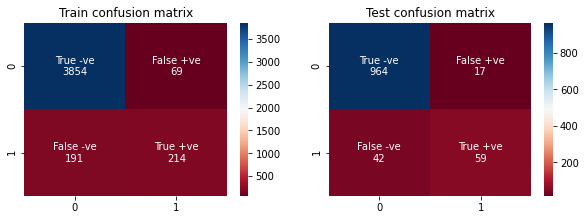

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(221)
print("="*100)
from sklearn.metrics import confusion_matrix
cf_matr1=confusion_matrix(y_train,y_pred_tr)
plt.title('Train confusion matrix')
Heatmapgen(cf_matr1)
ax2 = fig.add_subplot(222)
cf_matr2=confusion_matrix(y_test,y_pred_te)
plt.title('Test confusion matrix')
Heatmapgen(cf_matr2)
print('F1 score on test set =',f1_score(y_test,y_pred_te))

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Sl No','Classifier Name','Train/Validation F1_scr','Test F1_Scr']
x.add_row([6,'Random Forest',0.605,0.64])
x.add_row([7,'XGBoost(Oversampling)',0.572,0.605])
x.add_row([8,'XGBoost(weight_balancing)',0.587,0.592])
x.add_row([9,'LightGBM(oversampling)',0.569,0.529])
x.add_row([10,'LightGBM',0.554,0.601])
x.add_row([11,'Catboost',0.543,0.642])
x.add_row([12,'Custom_ensemble',0.646,0.648])
x.add_row([12,'Tuned_Custom_ensemble',0.622,0.666])
print(x)

+-------+---------------------------+-------------------------+-------------+
| Sl No |      Classifier Name      | Train/Validation F1_scr | Test F1_Scr |
+-------+---------------------------+-------------------------+-------------+
|   6   |       Random Forest       |          0.605          |     0.64    |
|   7   |   XGBoost(Oversampling)   |          0.572          |    0.605    |
|   8   | XGBoost(weight_balancing) |          0.587          |    0.592    |
|   9   |   LightGBM(oversampling)  |          0.569          |    0.529    |
|   10  |          LightGBM         |          0.554          |    0.601    |
|   11  |          Catboost         |          0.543          |    0.642    |
|   12  |      Custom_ensemble      |          0.646          |    0.648    |
|   12  |   Tuned_Custom_ensemble   |          0.622          |    0.666    |
+-------+---------------------------+-------------------------+-------------+


By stacking we observe a minor boost in performance at the cost of interpretability of the model.

In [34]:
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid, file)
